##**Q1**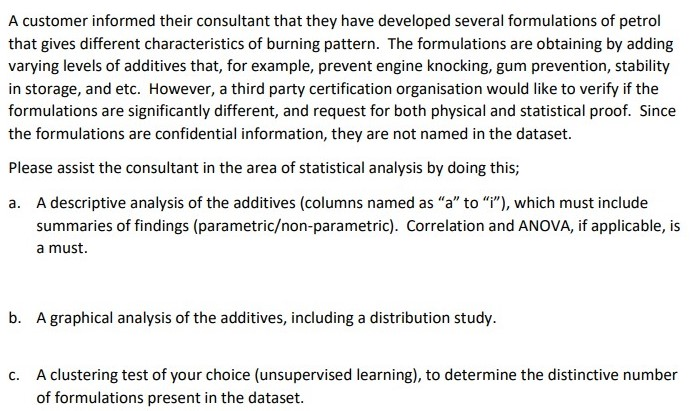

**Solution**

##a

In [15]:
# Input data
import pandas as pd

data_Q1 = pd.read_csv('ingredient.csv')
data_Q1.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [16]:
# Analyze descriptive 
data_Q1.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [32]:
# Determine variance

vars = [var for var in data_Q1.columns if data_Q1[var].dtypes != 'O']  

def data_Q1_var(column):
    print(f"{round(column.var(),2)}")
    
for var in vars:
    if var == vars[0]:
        print(f"Variance")

    data_Q1_var(data_Q1[var])

Variance
0.0
0.67
2.08
0.25
0.6
0.43
2.03
0.25
0.01


Conclusion:
1. Column c and g have high variance
2. Column a and i have low variance

In [17]:
# Analyze correlation
data_Q1.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


Conclusion:
1. Overall, column a and g have the highest correlation
2. Almost all column have low correlation between each other except with themself

##b

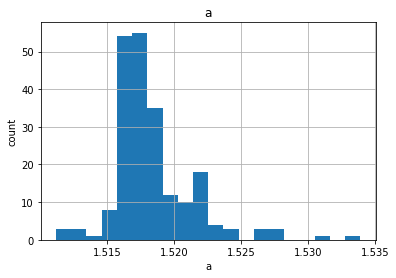

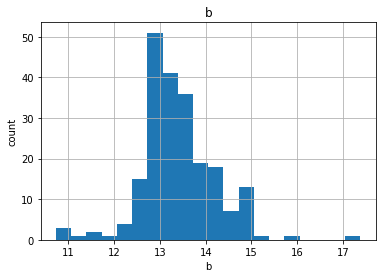

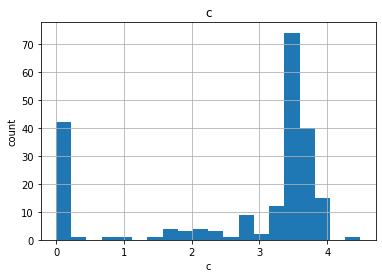

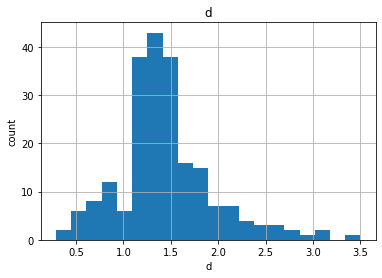

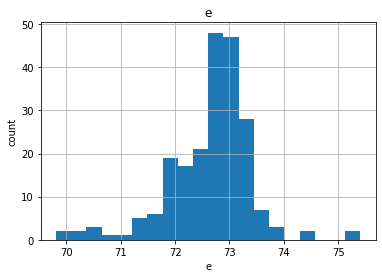

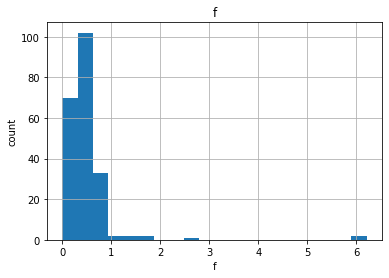

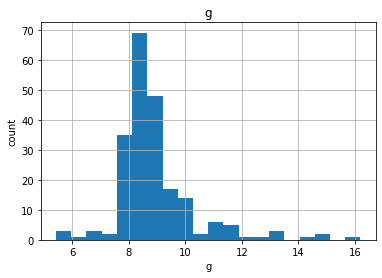

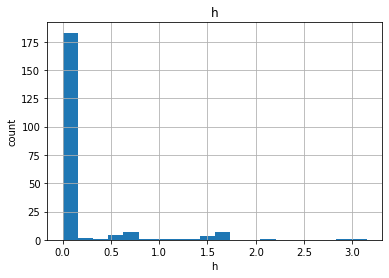

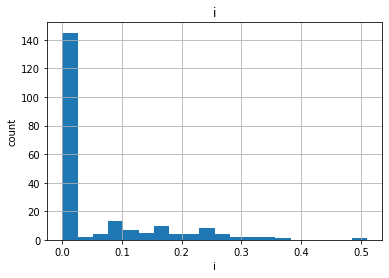

In [33]:
# Analyze the distributions each columns

def analyze_dist(data_Q1, var):
    df = data_Q1.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in vars:
    analyze_dist(data_Q1, var)

Conclusion:
1. Columns a, d, f, and g are positive-skewed
2. Column e is negative skewed

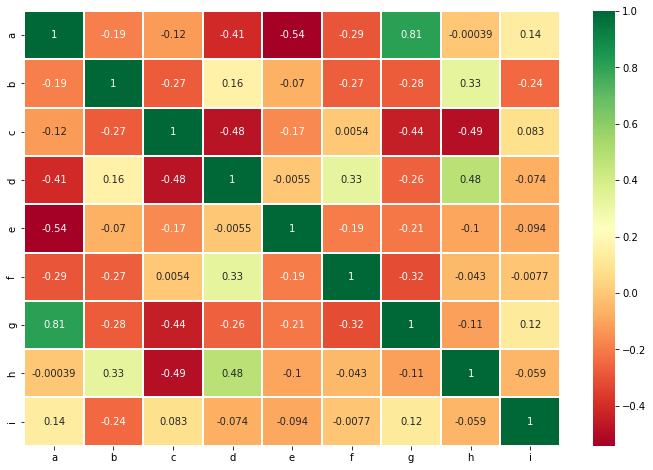

In [35]:
# Analyze correlation by graph
import seaborn as sns

sns.heatmap(data_Q1.corr(),annot=True,cmap='RdYlGn',linewidths=1) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Conclusion:
1. Correlation between columns a and g have the highest value which is 0.84 and represent by soft green colour
2. Correlation between columns a and e have the lowest value which is -0.54 and represent by dark red colour

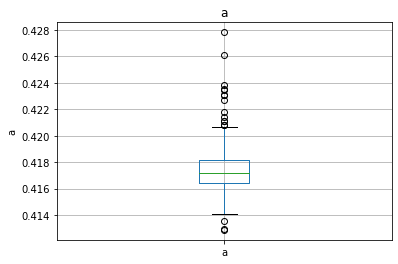

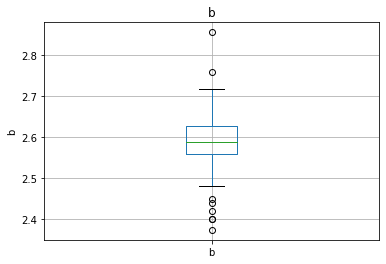

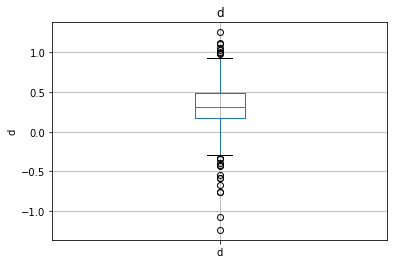

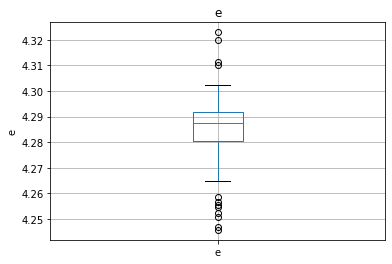

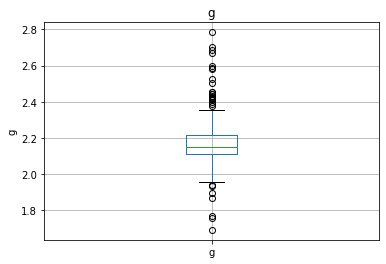

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#make boxplots to find outliers
def outliers(data_Q1, var):
    data_Q1 = data_Q1.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data_Q1[var].unique():
        pass
    else:
        data_Q1[var] = np.log(data_Q1[var])
        data_Q1.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

for var in vars:
    outliers(data_Q1, var)

##c

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [38]:
df1 = data_Q1.copy()

[1342.7570466443026, 820.0278544371247, 589.0314496288754, 489.0405214469389, 400.4981746098392, 336.29263337746863, 292.61477614787964, 266.7290340882002, 245.35092231886682, 233.3368133211883]


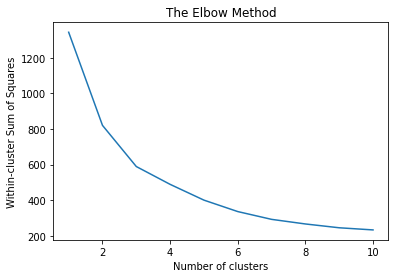

In [48]:
wcss = []
for i in range(1,11):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(df1)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
print(wcss)

Conclusion:
The Elbow method is a heuristic used in determining the number of clusters in a data set. Based on the output above, we can see the inflection point is clustering number 3. So, based on the Elbow method we should have 3 clusters.